In [ ]:
"""
Evaluates a pre-trained Random Forest model using test data. 
It loads the test dataset and model, encodes categorical features, and prepares inputs. 
then makes predictions and calculates accuracy, a confusion matrix, 
and a classification report to assess model performance.
"""

import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

test_data = pd.read_csv("../data/test/bangalore_test.csv")

model_filename = "../model/bangalore_population_rf_model.pkl"
loaded_model = joblib.load(model_filename)

print("Features the model was trained with:")
print(loaded_model.feature_names_in_)

label_encoder = LabelEncoder()
test_data['area_encoded'] = label_encoder.fit_transform(test_data['area'])

X_test = test_data[loaded_model.feature_names_in_]

y_test = test_data["area_points"]

y_pred = loaded_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Features the model was trained with:
['age' 'area_encoded' 'is_housed']
Accuracy: 100.00%
Confusion Matrix:
 [[  710     0     0]
 [    0 25473     0]
 [    0     0  3817]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       710
           2       1.00      1.00      1.00     25473
           3       1.00      1.00      1.00      3817

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



<Figure size 1000x800 with 0 Axes>

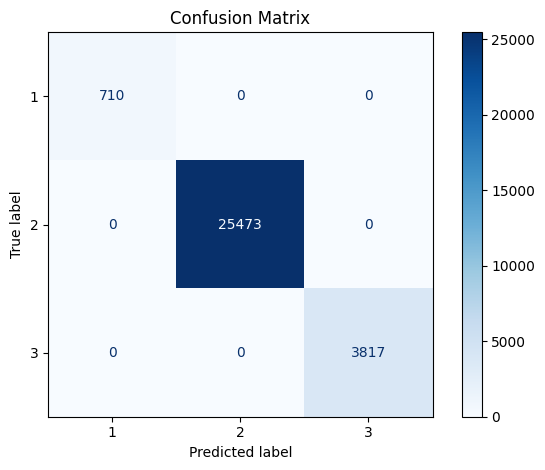

In [ ]:
"""
Visualizes the confusion matrix
"""
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

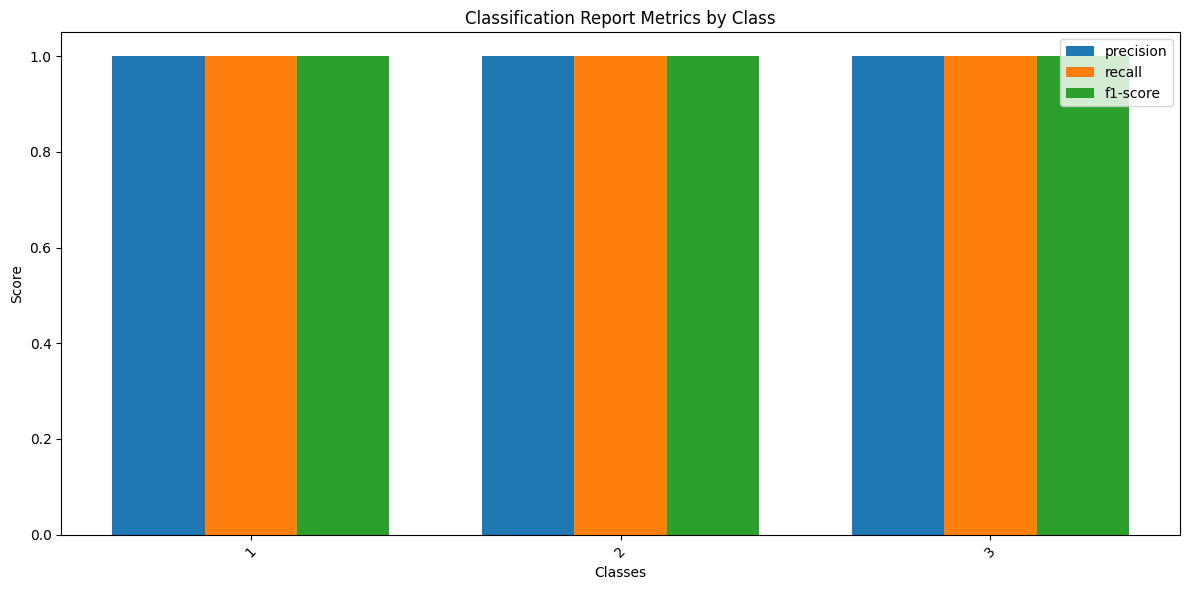

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       710
           2       1.00      1.00      1.00     25473
           3       1.00      1.00      1.00      3817

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [ ]:
"""
This block visualizes the confusion matrix to evaluate the model's performance. 
It begins by setting the figure size for the plot and computing the confusion matrix 
based on the true and predicted values. The ConfusionMatrixDisplay class is used to 
plot the matrix with a blue color map and integer value formatting for better readability. 
A title is added to the plot, and the layout is adjusted to ensure all elements are 
properly displayed without overlap. Finally, the plot is rendered for visualization.
"""

def plot_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    
    metrics = ['precision', 'recall', 'f1-score']
    classes = list(report.keys())[:-3] 
    
    plt.figure(figsize=(12, 6))
    x = np.arange(len(classes))
    width = 0.25
    
    for i, metric in enumerate(metrics):
        values = [report[cls][metric] for cls in classes]
        plt.bar(x + i*width, values, width, label=metric)
    
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.title('Classification Report Metrics by Class')
    plt.xticks(x + width, classes, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
#example

import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

model_filename = "../model/bangalore_population_rf_model.pkl"
loaded_model = joblib.load(model_filename)

label_encoder = LabelEncoder()

train_data = pd.read_csv("../data/train/bangalore_train.csv")

label_encoder.fit(train_data['area'])

def predict_points(area_input, age_value=30, is_housed_value=1):  
    area_encoded = label_encoder.transform([area_input])[0]  
    
    features = {
        "area_encoded": area_encoded,
        "age": age_value, 
        "is_housed": is_housed_value  
    }

    feature_names = loaded_model.feature_names_in_  
    input_data = pd.DataFrame([features], columns=feature_names)  

    predicted_points = loaded_model.predict(input_data)
    
    return predicted_points[0]

area_input = "Indiranagar" 
predicted_points = predict_points(area_input)

print(f"Predicted points for area {area_input}: {predicted_points}")


Predicted points for area Indiranagar: 3
